# Addition and subtraction

This tutorial demonstrates how two numbers can be added or subtracted using [arithmetic through the quantum Fourier transform](https://arxiv.org/abs/quant-ph/0008033). This operation resembles:

$$ |A\rangle^{\otimes n}|B\rangle^{\otimes n} \rightarrow |A\rangle^{\otimes n}|B\pm A\rangle^{\otimes n} $$

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
import qiskit_tools as qt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

Let us assign $A$ and $B$ as two positive digits:

In [2]:
digit_A = 5.25
digit_B = 7.5

print(digit_A,'+',digit_B,'=',digit_A+digit_B)

5.25 + 7.5 = 12.75


We can set the register length $n$ such that the exact required precision is given:

In [3]:
nint = qt.get_nint([digit_A+digit_B,digit_A,digit_B])
npres = qt.get_npres([digit_A+digit_B,digit_A,digit_B])
n = nint + npres + 1

Giving binary strings:

In [4]:
phase = True

binary_A = qt.my_binary_repr(digit_A, n, nint=nint, phase=phase)
binary_B = qt.my_binary_repr(digit_B, n, nint=nint, phase=phase)

print(binary_A,binary_B)

0010101 0011110


Let us now write these to qiskit quantum registers and perform the addition. First we initiate the registers:

In [5]:
qregA = QuantumRegister(n, 'A')
qregB = QuantumRegister(n, 'B')
out_reg = ClassicalRegister(n, 'A+B')
circ = QuantumCircuit(qregA, qregB, out_reg)

Then input the binary strings into registers $A$ and $B$:

In [6]:
A_gate = qt.input_bits_to_qubits(binary_A, circ, reg=qregA, wrap=True)
B_gate = qt.input_bits_to_qubits(binary_B, circ, reg=qregB, wrap=True)
circ.append(A_gate, qregA);
circ.append(B_gate, qregB);

The addition operation is implemented through the function:

In [7]:
add_gate = qt.QFTAddition(circ, qregA, qregB, wrap=True)
circ.append(add_gate, [*qregA, *qregB]);

We can simulate this circuit and measure the outcome of the $B$ register:

In [8]:
circ.measure(qregB, out_reg);

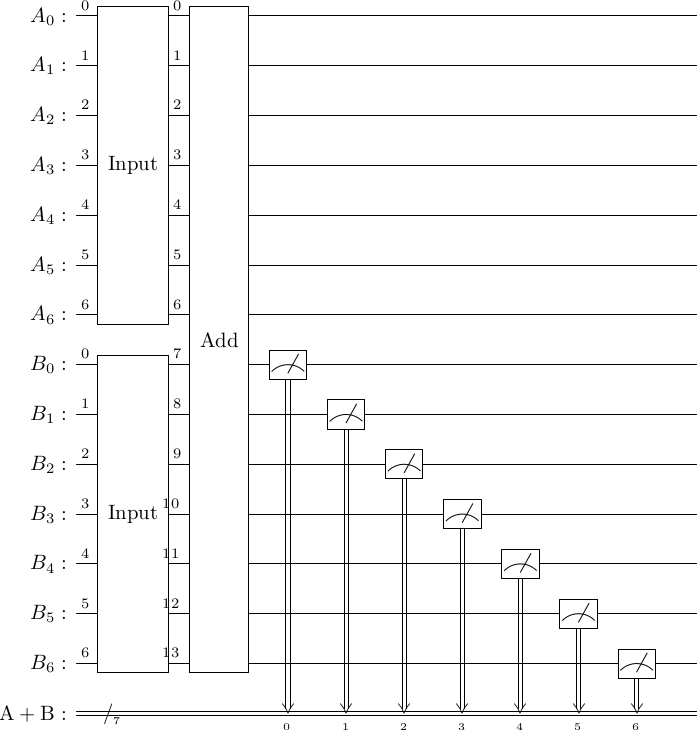

In [9]:
circ.draw(output="latex")

In [10]:
shots=20
emulator = Aer.get_backend('qasm_simulator')
job = execute(circ, emulator, shots=shots )
hist = job.result().get_counts()

Let us now see the result:

In [11]:
print('Target:')
print(digit_B,'+',digit_A,'=',digit_B+digit_A,'->',qt.my_binary_repr(digit_B+digit_A, n, nint=nint, phase=phase))

print('Result:')
for label in hist.keys():
    print(digit_B,'+',digit_A,'=',qt.bin_to_dec(label, nint=nint, phase=phase),'->',label,'with probability',float(hist[label])/shots)

Target:
7.5 + 5.25 = 12.75 -> 0110011
Result:
7.5 + 5.25 = 12.75 -> 0110011 with probability 1.0


Perfect! We obtain the target of $A+B$. 

Now lets repeat this exercise, but change $B$ to a negative digit and repeat the same steps as before:

In [12]:
digit_A = 5.25
digit_B = -7.5

print(digit_A,'+',digit_B,'=',digit_A+digit_B)

5.25 + -7.5 = -2.25


In [13]:
nint = qt.get_nint([digit_A+digit_B,digit_A,digit_B])
npres = qt.get_npres([digit_A+digit_B,digit_A,digit_B])
n = nint + npres + 1

In [14]:
phase = True

binary_A = qt.my_binary_repr(digit_A, n, nint=nint, phase=phase)
binary_B = qt.my_binary_repr(digit_B, n, nint=nint, phase=phase)

In [15]:
print(binary_A,binary_B)

010101 100010


In [16]:
qregA = QuantumRegister(n, 'A')
qregB = QuantumRegister(n, 'B')
out_reg = ClassicalRegister(n, 'A+B')
circ = QuantumCircuit(qregA, qregB, out_reg)

In [17]:
A_gate = qt.input_bits_to_qubits(binary_A, circ, reg=qregA, wrap=True)
B_gate = qt.input_bits_to_qubits(binary_B, circ, reg=qregB, wrap=True)
circ.append(A_gate, qregA);
circ.append(B_gate, qregB);

In [18]:
add_gate = qt.QFTAddition(circ, qregA, qregB, wrap=True)
circ.append(add_gate, [*qregA, *qregB]);

In [19]:
circ.measure(qregB, out_reg);

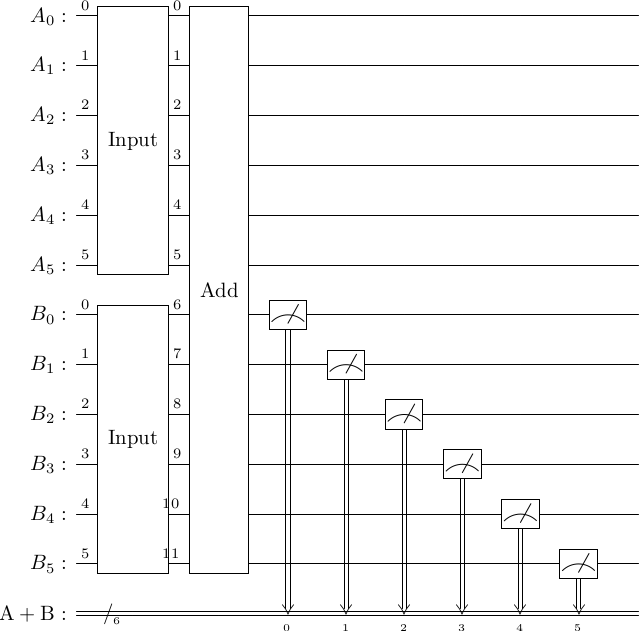

In [20]:
circ.draw(output="latex")

In [21]:
shots=20
emulator = Aer.get_backend('qasm_simulator')
job = execute(circ, emulator, shots=shots )
hist = job.result().get_counts()

In [22]:
print('Target:')
print(digit_B,'+',digit_A,'=',digit_B+digit_A,'->',qt.my_binary_repr(digit_B+digit_A, n, nint=nint, phase=phase))

print('Result:')
for label in hist.keys():
    print(digit_B,'+',digit_A,'=',qt.bin_to_dec(label, nint=nint, phase=phase),'->',label,'with probability',float(hist[label])/shots)

Target:
-7.5 + 5.25 = -2.25 -> 110111
Result:
-7.5 + 5.25 = -2.25 -> 110111 with probability 1.0


Again, we obtain the desired result! We can then see that by representing positive and negative numbers using twos-complement notation allows for simple treatment of addition and subtraction. If we define a twos-complement operation, we can more specifically define if we wish to perform an addition or subtraction. 

Consider the example of encoding the first two digits:

In [23]:
digit_A = 5.25
digit_B = 7.5

Now lets try to subtract $B$ from $A$ to result in the same value as our second example. Lets assign the correct number of bits:

In [24]:
nint = qt.get_nint([digit_A-digit_B,digit_A,digit_B])
npres = qt.get_npres([digit_A-digit_B,digit_A,digit_B])
n = nint + npres + 1

And determine the bit strings as before:

In [25]:
phase = True

binary_A = qt.my_binary_repr(digit_A, n, nint=nint, phase=phase)
binary_B = qt.my_binary_repr(digit_B, n, nint=nint, phase=phase)

print(binary_A,binary_B)

010101 011110


In [26]:
qregA = QuantumRegister(n, 'A')
qregB = QuantumRegister(n, 'B')
out_reg = ClassicalRegister(n, 'A+B')
circ = QuantumCircuit(qregA, qregB, out_reg)

In [27]:
A_gate = qt.input_bits_to_qubits(binary_A, circ, reg=qregA, wrap=True)
B_gate = qt.input_bits_to_qubits(binary_B, circ, reg=qregB, wrap=True)
circ.append(A_gate, qregA);
circ.append(B_gate, qregB);

In [28]:
tc_gate = qt.TwosCompliment(circ, qregB, wrap=True)
circ.append(tc_gate, qregB);

In [29]:
add_gate = qt.QFTAddition(circ, qregA, qregB, wrap=True)
circ.append(add_gate, [*qregA, *qregB]);

In [30]:
circ.measure(qregB, out_reg);

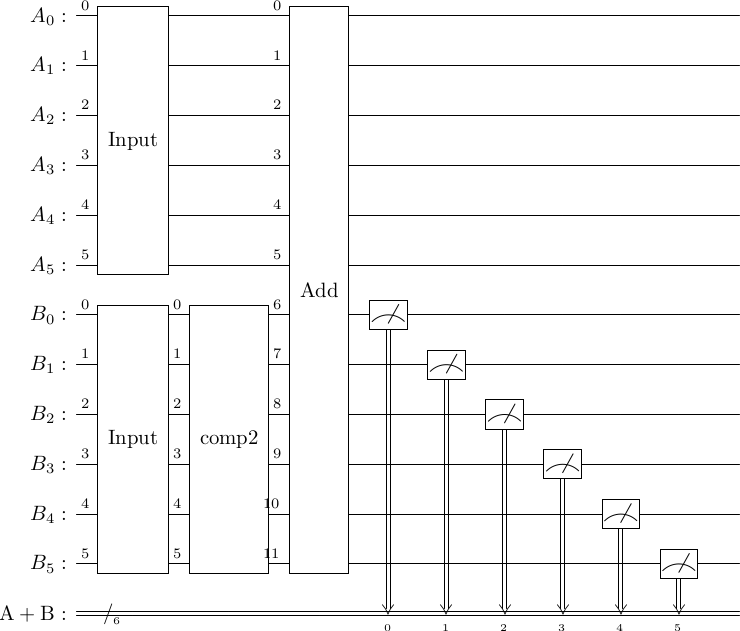

In [31]:
circ.draw(output="latex")

In [32]:
shots=20
emulator = Aer.get_backend('qasm_simulator')
job = execute(circ, emulator, shots=shots )
hist = job.result().get_counts()

In [33]:
print('Target:')
print(digit_B,'-',digit_A,'=',digit_B-digit_A,'->',qt.my_binary_repr(digit_A-digit_B, n, nint=nint, phase=phase))

print('Result:')
for label in hist.keys():
    print(digit_B,'-',digit_A,'=',qt.bin_to_dec(label, nint=nint, phase=phase),'->',label,'with probability',float(hist[label])/shots)

Target:
7.5 - 5.25 = 2.25 -> 110111
Result:
7.5 - 5.25 = -2.25 -> 110111 with probability 1.0


Note that while this works, this incurs an additional addition step to increment by the smallest digit, and therefore effectively doubles the computational cost. We can therefore see it is important to choose the representation carefully in order to reduce computational costs.

Finally, let us look at if we consider adding two digits in the twos-complement representation, and use two binary strings of different lengths to store them in. Let us consider:

In [34]:
digit_A = -5.5
digit_B = 7.25

And retreive the required number of bits:

In [35]:
nintA = qt.get_nint([digit_A])
npresA = qt.get_npres([digit_A])
nA = nintA + npresA + 1

The secondary register must be able to store the $B$ digit and $A+B$:

In [36]:
nintB = qt.get_nint([digit_B,digit_A+digit_B])
npresB = qt.get_npres([digit_B,digit_A+digit_B])
nB = nintB + npresB + 1

These form binary strings of different lengths (if the fractional part of $B$ is chosen to be smaller than $A$):

In [37]:
phase = True

binary_A = qt.my_binary_repr(digit_A, nA, nint=nintA, phase=phase)
binary_B = qt.my_binary_repr(digit_B, nB, nint=nintB, phase=phase)

print(binary_A,binary_B)

10101 011101


Let us initialize the registers as before:

In [38]:
qregA = QuantumRegister(nA, 'A')
qregB = QuantumRegister(nB, 'B')
out_reg = ClassicalRegister(nB, 'A+B')
circ = QuantumCircuit(qregA, qregB, out_reg)

and input the values of $A$ and $B$:

In [39]:
A_gate = qt.input_bits_to_qubits(binary_A, circ, reg=qregA, wrap=True)
B_gate = qt.input_bits_to_qubits(binary_B, circ, reg=qregB, wrap=True)
circ.append(A_gate, qregA);
circ.append(B_gate, qregB);

Now we must use the arguements `nint1` and `nint2` to set the number of integer bits of the first and second registers, as well as specifying the `phase`: 

In [40]:
circ = qt.QFTAddition(circ, qregA, qregB, nint1=nintA, nint2=nintB, phase=phase)

Let's measure this and see the result:

In [41]:
circ.measure(qregB, out_reg);

In [42]:
shots=20
emulator = Aer.get_backend('qasm_simulator')
job = execute(circ, emulator, shots=shots )
hist = job.result().get_counts()

In [43]:
print('Target:')
print(digit_B,'+',digit_A,'=',digit_B+digit_A,'->',qt.my_binary_repr(digit_A+digit_B, nB, nint=nintB, phase=phase))

print('Result:')
for label in hist.keys():
    print(digit_B,'+',digit_A,'=',qt.bin_to_dec(label, nint=nintB, phase=phase),'->',label,'with probability',float(hist[label])/shots)

Target:
7.25 + -5.5 = 1.75 -> 000111
Result:
7.25 + -5.5 = 1.75 -> 000111 with probability 1.0


Just as desired!